In [34]:
from keras.datasets import mnist # subroutines for fetching the MNIST dataset
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Dense # the two types of neural network layer we will be using
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values

import matplotlib.pyplot as plt
import numpy as np
import cv2

np.set_printoptions(suppress=True)

In [2]:
batch_size = 128 # in each iteration, we consider 128 training examples at once
num_epochs = 5 # we iterate twenty times over the entire training set
hidden_size = 512 # there will be 512 neurons in both hidden layers

In [3]:
num_train = 60000 # there are 60000 training examples in MNIST
num_test = 10000 # there are 10000 test examples in MNIST

height, width, depth = 28, 28, 1 # MNIST images are 28x28 and greyscale
num_classes = 10 # there are 10 classes (1 per digit)

(X_train, y_train), (X_test, y_test) = mnist.load_data() # fetch MNIST data

X_train = X_train.reshape(num_train, height * width) # Flatten data to 1D
X_test = X_test.reshape(num_test, height * width) # Flatten data to 1D
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255 # Normalise data to [0, 1] range
X_test /= 255 # Normalise data to [0, 1] range

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

In [9]:
inp = Input(shape=(height * width,)) # Our input is a 1D vector of size 784
hidden_1 = Dense(hidden_size, activation='relu')(inp) # First hidden ReLU layer
hidden_2 = Dense(hidden_size, activation='relu')(hidden_1) # Second hidden ReLU layer
out = Dense(num_classes, activation='softmax')(hidden_2) # Output softmax layer

model = Model(inp, out) # To define a model, just specify its input and output layers

In [10]:
model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

In [11]:
model.fit(X_train, Y_train, # Train the model using the training set...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.5) # ...holding out 10% of the data for validation
model.evaluate(X_test, Y_test, verbose=1) # Evaluate the trained model on the test set!

Epoch 1/5
235/235 [==============================] - 3s 13ms/step - loss: 0.3036 - accuracy: 0.9110 - val_loss: 0.1691 - val_accuracy: 0.9492
Epoch 2/5
235/235 [==============================] - 3s 13ms/step - loss: 0.1032 - accuracy: 0.9685 - val_loss: 0.1249 - val_accuracy: 0.9631
Epoch 3/5
235/235 [==============================] - 3s 12ms/step - loss: 0.0662 - accuracy: 0.9795 - val_loss: 0.1065 - val_accuracy: 0.9680
Epoch 4/5
235/235 [==============================] - 3s 12ms/step - loss: 0.0434 - accuracy: 0.9869 - val_loss: 0.1034 - val_accuracy: 0.9701
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0816 - accuracy: 0.9771


[0.08164970576763153, 0.9771000146865845]

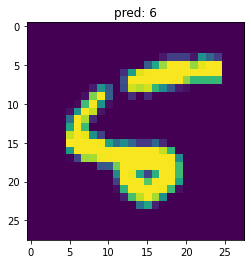

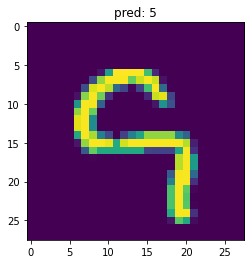

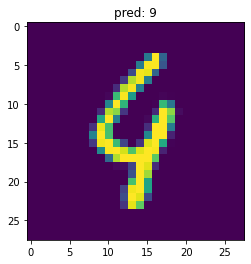

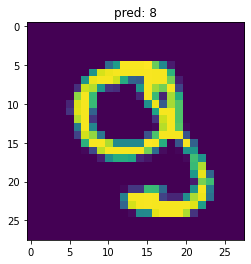

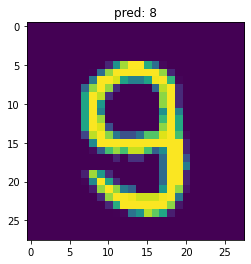

In [40]:
def wrong_ans(pred,truth):
    wrong = []
    for i in range(len(pred)):
        if np.argmax(pred[i]) != np.argmax(truth[i]):
            wrong.append(i)
    return wrong

def show(wrong_ind, arr, truth,pred):
    for i in wrong_ind[:5]:
        example = arr[i].copy()
        example = np.reshape(example, (28,28), order = 'C')
        plt.title('pred: '+ str(np.argmax(pred[i])) + ' truth: ' + str(np.argmax(truth[i])))
        plt.imshow(example),
        plt.show()

predicts = model.predict(X_test)

wrong = wrong_ans(predicts,Y_test)
show(wrong, X_test, Y_test, predicts)
